In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from numpy.random import randn
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve, average_precision_score
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

### Question No. 1: (Showing data) [5 Marks]
Load the training and test data files and answer the following questions:

i. How many training and test examples are there? You can use np.loadtxt for this purpose.
Show some objects of each class using plt.matshow
#### Answer i:
* the number of train set is 3000 and test set is 5000.

ii. How many positive and negative examples are there in the training dataset?
#### Answer ii:
* the number of positive examples is 1179 and negative examples is 1821 in the training dataset.

iii. Which performance metric (accuracy, AUC-ROC and AUC-PR) should be used? Give your 
reasoning. 
#### Answer iii:
*   AUC-ROC should be used as performance metric in this training set. For accuracy, the data label set should be evenly distributed while AUC-PR is used when the difference between the positive and negative sample sizes is very large.  The number of positive and negative examples in this data set are both large but are not evenly, so it should use VUC-ROC metric.


iv. What is the expected accuracy of a random classifier (one that generates random labels for a 
given example) for this problem over the training and test datasets? Demonstrate why this 
would be the case.
#### Answer iv:
* The expected accuracy of a random classifier is 0.5.The probabilities of the positive and negative categories produced by the random classifier are equal.

v. What is the AUC-ROC and AUC-PR of a random classifier for this problem over the training 
and test datasets? Demonstrate why this would be the case.
#### Answer v:
* In the code below, I built a random classifier and used 'sklearn.metrics' to calculate AUC-ROC and AUC-PR.

|AUC-ROC|AUC-PR|
|:-------|------:|
|0.4960| 0.5349|

In [13]:
# i the number of training and text examples
Xtrain = np.loadtxt('Xtrain.csv')
Ytrain = np.loadtxt('Ytrain.csv',dtype ='int')
Xtest = np.loadtxt('Xtest.csv')
print('the number of train set is',len(Xtrain))
print('the number of test set is',len(Xtest))

the number of train set is 3000
the number of test set is 5000


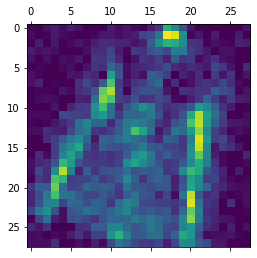

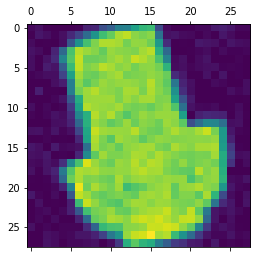

In [14]:
# i show some objects

plt.matshow(Xtrain[0].reshape((28,-1)))
plt.matshow(Xtrain[1].reshape((28,-1)))

In [15]:
# ii positive and negative examples
positive = 0
negative = 0
for i in range(len(Ytrain)):
    if Ytrain[i] == 1:
        positive += 1
    else:
        negative += 1
print('the number of positive example is', positive)
print('the number of negative example is', negative)

the number of positive example is 1179
the number of negative example is 1821


In [17]:

def plotROC(y,z,pstr = ''):
    fpr,tpr,tt = roc_curve(y, z)
    roc_auc = auc(fpr, tpr)
    #plt.figure()
    #plt.plot(tt,fpr,'o-',tt,tpr,'x-');plt.xlabel('threshold');plt.ylabel('Percentage');plt.legend(['FPR','TPR']);plt.grid();plt.title(pstr)
    #plt.figure()
    #plt.plot(fpr,tpr,'o-');plt.xlabel('FPR');plt.ylabel('TPR');plt.grid();plt.title('ROC '+pstr+' AUC: '+str(roc_auc))
    return roc_auc

def plotPRC(y,z,pstr = ''):
    P,R,tt = precision_recall_curve(y, z)
    pr_auc = auc(R, P)
    #plt.figure()
    #plt.plot(tt,R[:-1],'o-',tt,P[:-1],'x-');plt.xlabel('threshold');plt.ylabel('Percentage');plt.legend(['Recall','Precision']);plt.grid();plt.title(pstr)
    #plt.figure()
    #plt.plot(R,P,'o-');plt.xlabel('Recall');plt.ylabel('Precision');plt.grid();plt.title('PRC '+pstr+' AUC: '+str(pr_auc))
    return pr_auc

In [18]:
# v This classifier will generate a random score of any example given as input
random_label = np.random.randint(0,2,len(Xtrain))*2-1

In [19]:
roc_tr = plotROC(Ytrain,random_label,'Training')
pr_tr = plotPRC(Ytrain,random_label,'Training')
acc = accuracy_score(Ytrain,random_label)
print('AUC ROC:',roc_tr)
print('AUC PRC:',pr_tr)
print('random accuracy:',acc)

AUC ROC: 0.49598897789850666
AUC PRC: 0.5349010785475112
knn accuracy: 0.5006666666666667


### Question No. 2: (Nearest Neighbor Classifier) [5 Marks]
Perform 5-fold stratified cross-validation (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) over the training
dataset using the k = 1 nearest neighbour classifier and answer the following questions:

i. What is the prediction accuracy, AUC-ROC and AUC-PR for each fold using this classifier?
Show code to demonstrate the results.
#### Answer i :
* k = 1 nearest neighbour classifier
* Fold-Wise AUC ROC= [0.7687717668911074, 0.7542838517414788, 0.7445520581113801, 0.7390575526168746, 0.7249064765022212]
* Fold-Wise AUC PRC= [0.7720045104630118, 0.7597063080730261, 0.7501921830138002, 0.7447056679424093, 0.7309879354697664]
* Fold-Wise accuracy= [0.7737104825291181, 0.7633333333333333, 0.7533333333333333, 0.7466666666666667, 0.7362270450751253]
ii. What is the mean and standard deviation of each performance metric (accuracy, AUC-ROC and AUC-PR)across all the folds for this classifier? Show code to demonstrate the results.
#### Answer ii :
* AUC ROC: Mean is 0.746314, Stdev is 0.014710
* AUC PRC: Mean is 0.751519, Stdev is 0.013830
* ACCURACY: Mean is 0.754654, Stdev is 0.012989

iii. What is the impact of various forms of pre-processing (https://scikit-learn.org/stable/modules/preprocessing.html ) on the cross-validation performance?
Show code to demonstrate the results.
#### Answer iii :
* The preprocessing of StandardScaler and normalizer can slightly improve the accuracy of this classifier.

iv. Use 5-fold cross-validation over training data to calculate the optimal value of k for the 
k-Nearest neighbour classifier. What is the optimal value of k and what are the cross-validation accuracy, AUC-ROC and AUC-PR? Show code to demonstrate the results
#### Answer iv :
* the optimal value of k is 6.
* AUC ROC: Mean is 0.834109, Stdev is 0.016166
* AUC PRC: Mean is 0.752320, Stdev is 0.029342
* ACC: Mean is 0.750012, Stdev is 0.014431

In [116]:
def clf_performance(Xtrain,Ytrain,clf):
    
    skf = StratifiedKFold(n_splits=5,shuffle = True)
    A = []
    B = []
    C = []
    for i,(tr_idx, v_idx) in enumerate(skf.split(Xtrain, Ytrain)):
        Xtr, Xv = Xtrain[tr_idx], Xtrain[v_idx]
        ytr, yv = Ytrain[tr_idx], Ytrain[v_idx]
        clf.fit(Xtr,ytr)
        clf_predict = clf.predict(Xv)
        try:
            clf_z = clf.predict_proba(Xv)[:,1]
        except Exception as e:
            clf_z = clf.decision_function(Xv)
        clf_roc_auc = plotROC(yv,clf_z,pstr = 'Validation Fold: '+str(i))
        clf_pr_auc = plotPRC(yv,clf_z,pstr = 'Validation Fold: '+str(i))
        clf_acc = accuracy_score(yv,clf_predict)
        A.append(clf_roc_auc)
        B.append(clf_pr_auc)
        C.append(clf_acc)
    print('Fold-Wise AUC ROC=',A)
    print('Fold-Wise AUC PRC=',B)
    print('Fold-Wise accuracy=',C)    
    print("AUC ROC: Mean is %f, Stdev is %f"%(np.mean(A),np.std(A)))
    print("AUC PRC: Mean is %f, Stdev is %f"%(np.mean(B),np.std(B)))
    print("ACC: Mean is %f, Stdev is %f"%(np.mean(C),np.std(C)))
    return

In [21]:
# i / ii
knn1 = KNeighborsClassifier(n_neighbors=1)
clf_performance(Xtrain,Ytrain,knn1)

Fold-Wise AUC ROC= [0.7687717668911074, 0.7542838517414788, 0.7445520581113801, 0.7390575526168746, 0.7249064765022212]
Fold-Wise AUC PRC= [0.7720045104630118, 0.7597063080730261, 0.7501921830138002, 0.7447056679424093, 0.7309879354697664]
Fold-Wise accuracy= [0.7737104825291181, 0.7633333333333333, 0.7533333333333333, 0.7466666666666667, 0.7362270450751253]
AUC ROC: Mean is 0.746314, Stdev is 0.014710
AUC PRC: Mean is 0.751519, Stdev is 0.013830
AUC ACC: Mean is 0.754654, Stdev is 0.012989


In [22]:
# iii preprocessing

# MinMaxScaler
print('MinMaxScaler：')
min_max_scaler = preprocessing.MinMaxScaler()
Xtrain_minmax = min_max_scaler.fit_transform(Xtrain)
clf_performance(Xtrain_minmax,Ytrain,knn1)
# normalizer
print('Normalizer: ')
Xtrain_normalizer = preprocessing.Normalizer().fit_transform(Xtrain)
clf_performance(Xtrain_normalizer,Ytrain,knn1)
# StandardScaler
print('StandardScaler')
Xtrain_standardscaler = preprocessing.StandardScaler().fit_transform(Xtrain)
clf_performance(Xtrain_standardscaler,Ytrain,knn1)

MinMaxScaler：
Fold-Wise AUC ROC= [0.7363710239145577, 0.7447848761408082, 0.7375675172285341, 0.7274399329484075, 0.7505728314238952]
Fold-Wise AUC PRC= [0.7422843988832172, 0.7498151608167624, 0.7435232008891359, 0.7337073817158563, 0.7544825928853053]
Fold-Wise accuracy= [0.7470881863560732, 0.75, 0.7466666666666667, 0.7316666666666667, 0.7545909849749582]
AUC ROC: Mean is 0.739347, Stdev is 0.007866
AUC PRC: Mean is 0.744763, Stdev is 0.007070
AUC ACC: Mean is 0.746003, Stdev is 0.007706
Normalizer: 
Fold-Wise AUC ROC= [0.7550731367541211, 0.7733516483516485, 0.7618504376978953, 0.7295585770162041, 0.7548281505728313]
Fold-Wise AUC PRC= [0.7586760238520824, 0.7767563081009297, 0.7651012505554498, 0.7356757931334202, 0.7583402652780198]
Fold-Wise accuracy= [0.757071547420965, 0.7783333333333333, 0.7616666666666667, 0.7333333333333333, 0.7579298831385642]
AUC ROC: Mean is 0.754932, Stdev is 0.014360
AUC PRC: Mean is 0.758910, Stdev is 0.013394
AUC ACC: Mean is 0.757667, Stdev is 0.014

In [119]:
# iv search for the optimal value of k
k=[]
for i in range(21):
    k.append(i+1)
param_knn1 = {'n_neighbors':k}
skf = StratifiedKFold(n_splits=5,shuffle = True)
best_g = GridSearchCV(KNeighborsClassifier(),param_knn1,cv=skf,n_jobs = -1)
best_g.fit(Xtrain_normalizer,Ytrain)
print(best_g.best_params_)

{'n_neighbors': 6}


In [120]:
# compute performance metrics of KNN with optimal k
knn10 = KNeighborsClassifier(n_neighbors=6)
clf_performance(Xtrain,Ytrain,knn10)

Fold-Wise AUC ROC= [0.8206292082656141, 0.8191062115850252, 0.8547040882845967, 0.8231397839448686, 0.8529635258358663]
Fold-Wise AUC PRC= [0.7577910751875223, 0.7091453361100684, 0.7770679004376406, 0.7295219908885815, 0.7880760073992312]
Fold-Wise accuracy= [0.7287853577371048, 0.74, 0.7666666666666667, 0.75, 0.7646076794657763]
AUC ROC: Mean is 0.834109, Stdev is 0.016166
AUC PRC: Mean is 0.752320, Stdev is 0.029342
ACC: Mean is 0.750012, Stdev is 0.014431


### Question No. 3: [5 Marks]
Use 5-fold stratified cross-validation over training data to choose an optimal classifier between: k-nearest neighbour, Perceptron, Naïve Bayes Classifier, Logistic regression, Linear SVM and Kernelized SVM. Be sure to tune the hyperparameters of each classifier type (k for k-nearest neighbour, C and kernel type and parameters for SVM and so on). Report the cross validation results (mean and standard deviation of accuracy, AUC-ROC and AUC-PR across fold) of your best model. You may look into grid search as well as ways of preprocessing data. Show code to demonstrate the results. Also show the comparison of these classifiers using a single table.

#### Answer:

Best model of each classifier:

* KNN(preprocessing: normalizer):  KNeighborsClassifier(n_neighbors=12,weights = 'distance',p=1)

* Perceptron (preprocessing: normalizer):Perceptron(alpha=0.0001, fit_intercept= True, max_iter=100, penalty= 'l1', tol= 0.01)

* Naïve Bayes Classifier (no preprocessing): MultinomialNB(alpha=16, fit_prior= True)

* LogisticRegression (preprocessing: MinMaxScaler):LogisticRegression(C= 0.1, penalty= 'l2', solver= 'newton-cg')

* Linear SVM (preprocessing: normalizer): LinearSVC(C= 1, dual= False, penalty= 'l2',class_weight='balanced')

* Kernelized SVM (preprocessing:normalizer):SVC( kernel= 'rbf',class_weight='balanced',gamma = 7)

 cross validation results table:
 
|Classifier|AUC-ROC Mean|AUC-ROC Stdev|AUC-PR Mean|AUC-PR Stdev|Accuracy Mean|Accuracy Stdev|
|:-------:|:-------:|:-------:|:-------:|:-------:|:-------:|:------:|
|KNN|0.870323|0.012194|0.795426|0.023254|0.785661|0.013430|
|Perceptron|0.785537|0.010554|0.628048|0.015820|0.609306|0.062258|
|NaïveBayes|0.711962|0.025271|0.702713|0.018186|0.670651|0.024899|
|LogisticRe|0.796095|0.016299|0.644928|0.015895|0.710992|0.015142|
|LinearSVM|0.796323|0.012874|0.649459|0.020226|0.722335|0.016951|
|KernelizedSVM|0.877939|0.009090|0.784787|0.017470|0.794998|0.014452|


For this data set, KernelizedSVM classifier performs best.

In [96]:
#train knn classifier (no preprocessing)
param_knn = {'n_neighbors':[3,6,9,12],'weights':['uniform','distance'],'p':[1,2]}
best_g = GridSearchCV(KNeighborsClassifier(),param_knn,cv=5,scoring = 'roc_auc',n_jobs = -1)
best_g.fit(Xtrain,Ytrain)
print(best_g.best_params_)

{'n_neighbors': 12, 'p': 1, 'weights': 'distance'}


In [97]:
#train knn classifier (preprocessing: normalizer)
param_knn_norm = {'n_neighbors':[3,6,9,12],'weights':['uniform','distance'],'p':[1,2]}
best_g = GridSearchCV(KNeighborsClassifier(),param_knn_norm,cv=5,scoring = 'roc_auc',n_jobs = -1)
best_g.fit(Xtrain_normalizer,Ytrain)
print(best_g.best_params_)

{'n_neighbors': 12, 'p': 1, 'weights': 'distance'}


In [98]:
#train knn classifier(preprocessing: standardscaler)
param_knn_standard= {'n_neighbors':[3,6,9,12],'weights':['uniform','distance'],'p':[1,2]}
best_g = GridSearchCV(KNeighborsClassifier(),param_knn_standard,scoring = 'roc_auc',cv=5,n_jobs = -1)
best_g.fit(Xtrain_standardscaler,Ytrain)
print(best_g.best_params_)

{'n_neighbors': 12, 'p': 1, 'weights': 'distance'}


In [99]:
#knn (preprocessing: MinMaxScaler)
param_knn_minmax = {'n_neighbors':[3,6,9,12],'weights':['uniform','distance'],'p':[1,2]}
best_g = GridSearchCV(KNeighborsClassifier(),param_knn_minmax,scoring = 'roc_auc',cv=5,n_jobs = -1)
best_g.fit(Xtrain_minmax,Ytrain)
print(best_g.best_params_)

{'n_neighbors': 12, 'p': 1, 'weights': 'distance'}


In [100]:
# 5-fold stratified cross-validation
knn_opt = KNeighborsClassifier(n_neighbors=12,weights = 'distance',p=1)
print('knn (preprocessing: normalizer):')
clf_performance(Xtrain_normalizer,Ytrain,knn_opt)
print('knn (preprocessing: standardscaler):')
clf_performance(Xtrain_standardscaler,Ytrain,knn_opt)
print('knn (preprocessing: MinMaxScaler):')
clf_performance(Xtrain_minmax,Ytrain,knn_opt)

knn (preprocessing: normalizer):
Fold-Wise AUC ROC= [0.8897608544230323, 0.8561708418699943, 0.8592091171540324, 0.8697150307319799, 0.876759410801964]
Fold-Wise AUC PRC= [0.8283548924770333, 0.7792048299574583, 0.7695216663494279, 0.7820955126684265, 0.8179533521824999]
Fold-Wise accuracy= [0.8069883527454242, 0.775, 0.7683333333333333, 0.7866666666666666, 0.7913188647746243]
AUC ROC: Mean is 0.870323, Stdev is 0.012194
AUC PRC: Mean is 0.795426, Stdev is 0.023254
AUC ACC: Mean is 0.785661, Stdev is 0.013430
knn (preprocessing: standardscaler):
Fold-Wise AUC ROC= [0.8713141397724634, 0.8743946731234866, 0.857462981933321, 0.8662402216427639, 0.8654489127893383]
Fold-Wise AUC PRC= [0.7926951814877494, 0.7954312957056486, 0.7827021322016332, 0.7719302031300049, 0.7936064637993807]
Fold-Wise accuracy= [0.78369384359401, 0.7816666666666666, 0.7566666666666667, 0.7766666666666666, 0.7913188647746243]
AUC ROC: Mean is 0.866972, Stdev is 0.005783
AUC PRC: Mean is 0.787273, Stdev is 0.008858


In [28]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron
from sklearn.linear_model import Perceptron

In [105]:
# train Perceptron (no preprocessing)
param_pp_non = {'penalty':['l2','l1','elasticnet',None],'alpha':[0.00001,0.0001,0.001,0.01],'max_iter':[500,1000,1500,2000],'tol':[1e-4,1e-3,1e-2]}
best_g = GridSearchCV(Perceptron(),param_pp_non,cv=5,scoring = 'roc_auc',n_jobs = -1)
best_g.fit(Xtrain,Ytrain)
print(best_g.best_params_)

{'alpha': 0.01, 'max_iter': 500, 'penalty': 'l1', 'tol': 0.0001}


In [102]:
# Perceptron (preprocessing: MinMaxScaler)
param_pp_minmax = {'penalty':['l2','l1','elasticnet',None],'alpha':[0.00001,0.0001,0.001,0.01],'max_iter':[500,1000,1500,2000],'tol':[1e-4,1e-3,1e-2]}
best_g = GridSearchCV(Perceptron(),param_pp_minmax,cv=5,scoring = 'roc_auc',n_jobs = -1)
best_g.fit(Xtrain_minmax,Ytrain)
print(best_g.best_params_)

{'alpha': 0.0001, 'max_iter': 500, 'penalty': 'l1', 'tol': 0.0001}


In [103]:
# Perceptron (preprocessing:standardscaler)
param_pp_standard = {'penalty':['l2','l1','elasticnet',None],'alpha':[0.00001,0.0001,0.001,0.01],'fit_intercept':[True,False],'max_iter':[500,1000,1500,2000],'tol':[1e-4,1e-3,1e-2]}
best_g = GridSearchCV(Perceptron(),param_pp_standard,cv=5,scoring = 'roc_auc',n_jobs = -1)
best_g.fit(Xtrain_standardscaler,Ytrain)
print(best_g.best_params_)

{'alpha': 0.001, 'fit_intercept': True, 'max_iter': 500, 'penalty': 'l1', 'tol': 0.0001}


In [104]:
# Perceptron (preprocessing: normalizer)
param_pp_normalizer = {'penalty':['l2','l1','elasticnet',None],'alpha':[0.00001,0.0001,0.001,0.01],'fit_intercept':[True,False],'max_iter':[100,300,500,1000,1500,2000],'tol':[1e-4,1e-3,1e-2]}
best_g = GridSearchCV(Perceptron(),param_pp_normalizer,cv=5,scoring = 'roc_auc',n_jobs = -1)
best_g.fit(Xtrain_normalizer,Ytrain)
print(best_g.best_params_)

{'alpha': 0.0001, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l1', 'tol': 0.01}


In [106]:
# 5-fold stratified cross-validation
print('-------------------------------------')
pp_opt_non= Perceptron(alpha= 0.01, max_iter=500, penalty='l1', tol= 0.0001)
print('Perceptron (no preprocessing):')
clf_performance(Xtrain,Ytrain,pp_opt_non)

print('-------------------------------------')
pp_opt_normalizer= Perceptron(alpha=0.0001, fit_intercept= True, max_iter=100, penalty= 'l1', tol= 0.01)
print('Perceptron (preprocessing: normalizer):')
clf_performance(Xtrain_normalizer,Ytrain,pp_opt_normalizer)

print('-------------------------------------')
pp_opt_standard= Perceptron(alpha=0.001, fit_intercept= True, max_iter= 500, penalty= 'l1', tol= 0.0001)
print('Perceptron (preprocessing: standardscaler):')
clf_performance(Xtrain_standardscaler,Ytrain,pp_opt_standard)

print('-------------------------------------')
pp_opt_MinMax= Perceptron(alpha=0.0001, max_iter=500, penalty='l1', tol=0.0001)
print('Perceptron (preprocessing: MinMaxScaler):')
clf_performance(Xtrain_minmax,Ytrain,pp_opt_MinMax)

-------------------------------------
Perceptron (no preprocessing):
Fold-Wise AUC ROC= [0.7771186440677966, 0.7372415719873348, 0.7054968336747999, 0.7513619854721552, 0.752758943184475]
Fold-Wise AUC PRC= [0.6493190801815768, 0.6199532872777158, 0.5959284222016002, 0.5851385173084873, 0.6359073700655906]
Fold-Wise accuracy= [0.7104825291181365, 0.5833333333333334, 0.645, 0.695, 0.6110183639398998]
AUC ROC: Mean is 0.744796, Stdev is 0.023464
AUC PRC: Mean is 0.617249, Stdev is 0.023957
AUC ACC: Mean is 0.648967, Stdev is 0.048305
-------------------------------------
Perceptron (preprocessing: normalizer):
Fold-Wise AUC ROC= [0.779196656605526, 0.7925474948780034, 0.7974483143974669, 0.7903473644999068, 0.7681435585690904]
Fold-Wise AUC PRC= [0.6341941291615427, 0.6287758892541151, 0.6527901251530631, 0.6193514011920515, 0.6051288996247857]
Fold-Wise accuracy= [0.6405990016638935, 0.6483333333333333, 0.515, 0.6833333333333333, 0.5592654424040067]
AUC ROC: Mean is 0.785537, Stdev is 0

In [27]:
# Naïve Bayes Classifier
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB
from sklearn.naive_bayes import MultinomialNB

In [108]:
# NBC(non-preprocessing)
param_nb_normalizer = {'alpha' :[i for i in range(1,20)],'fit_prior':[True,False]}
best_g = GridSearchCV(MultinomialNB(),param_nb_normalizer,cv=5,scoring = 'roc_auc',n_jobs = -1)
best_g.fit(Xtrain,Ytrain)
print(best_g.best_params_)

{'alpha': 16, 'fit_prior': True}


In [84]:
# 5-fold stratified cross-validation
nb_opt_non = MultinomialNB(alpha=16, fit_prior= True)
print('nb (no preprocessing):')
clf_performance(Xtrain,Ytrain,nb_opt_non)


nb (no preprocessing):
Fold-Wise AUC ROC= [0.7411713489667981, 0.6873079251257218, 0.730920562488359, 0.7236158968150493, 0.6767944821136311]
Fold-Wise AUC PRC= [0.7237981114917537, 0.6820253435365524, 0.7121920539900034, 0.7157002820887283, 0.6798512589178823]
Fold-Wise accuracy= [0.6938435940099834, 0.635, 0.69, 0.6883333333333334, 0.6460767946577629]
AUC ROC: Mean is 0.711962, Stdev is 0.025271
AUC PRC: Mean is 0.702713, Stdev is 0.018186
AUC ACC: Mean is 0.670651, Stdev is 0.024899


In [26]:
# Logistic regression
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
from sklearn.linear_model import LogisticRegression

In [111]:
# lgr(non-preprocessing)
param_lgr = {'penalty':['l2'],'C':[0.1,1,10],'solver':['newton-cg','lbfgs','sag','saga']}
best_g = GridSearchCV(LogisticRegression(),param_lgr,cv=5,scoring = 'roc_auc',n_jobs = -1)
best_g.fit(Xtrain,Ytrain)
print(best_g.best_params_)

{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [112]:
# lgr(preprocessing: normalizer):
param_lgr_normalizer = {'penalty':['l2'],'C':[0.1,1,10],'solver':['newton-cg','lbfgs','sag','saga']}
best_g = GridSearchCV(LogisticRegression(),param_lgr_normalizer,cv=5,scoring = 'roc_auc',n_jobs = -1)
best_g.fit(Xtrain_normalizer,Ytrain)
print(best_g.best_params_)

{'C': 10, 'penalty': 'l2', 'solver': 'sag'}


In [113]:
# lgr(preprocessing:standardscaler)
param_lgr_standard = {'penalty':['l2'],'C':[0.1,1,10],'solver':['newton-cg','lbfgs','sag','saga']}
best_g = GridSearchCV(LogisticRegression(),param_lgr_standard,cv=5,scoring = 'roc_auc',n_jobs = -1)
best_g.fit(Xtrain_standardscaler,Ytrain)
print(best_g.best_params_)

{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [114]:
# lgr(preprocessing:minmaxscaler)
param_lgr_minmax = {'penalty':['l2'],'C':[0.1,1,10],'solver':['newton-cg','lbfgs','sag','saga']}
best_g = GridSearchCV(LogisticRegression(),param_lgr_minmax,cv=5,scoring = 'roc_auc',n_jobs = -1)
best_g.fit(Xtrain_minmax,Ytrain)
print(best_g.best_params_)

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [115]:
# 5-fold stratified cross-validation
print('-------------------------------------')
lgr_opt_non= LogisticRegression(C=0.1, penalty='l2', solver= 'saga')
print('LogisticRegression(no preprocessing):')
clf_performance(Xtrain,Ytrain,lgr_opt_non)

print('-------------------------------------')
lgr_opt_normalizer= LogisticRegression(C=10, penalty='l2', solver= 'sag')
print('LogisticRegression(preprocessing: normalizer):')
clf_performance(Xtrain_normalizer,Ytrain,lgr_opt_normalizer)

print('-------------------------------------')
lgr_opt_standard= LogisticRegression(C= 0.1, penalty='l2', solver= 'saga')
print('LogisticRegression (preprocessing: standardscaler):')
clf_performance(Xtrain_standardscaler,Ytrain,lgr_opt_standard)

print('-------------------------------------')
lgr_opt_MinMax= LogisticRegression(C= 0.1, penalty= 'l2', solver= 'newton-cg')
print('LogisticRegression (preprocessing: MinMaxScaler):')
clf_performance(Xtrain_minmax,Ytrain,lgr_opt_MinMax)

-------------------------------------
LogisticRegression(no preprocessing):


/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/local/java/python-pip-packages.cs909/lib64/python3.

Fold-Wise AUC ROC= [0.7175528209890876, 0.7735262618737195, 0.778624976718197, 0.7942470664928291, 0.7474281038110826]
Fold-Wise AUC PRC= [0.5466699822433911, 0.6246928269459324, 0.65497751308606, 0.6547590675510317, 0.5847470501204574]
Fold-Wise accuracy= [0.6638935108153078, 0.7216666666666667, 0.7116666666666667, 0.7116666666666667, 0.6944908180300501]
AUC ROC: Mean is 0.762276, Stdev is 0.026969
AUC PRC: Mean is 0.613169, Stdev is 0.042049
AUC ACC: Mean is 0.700677, Stdev is 0.020364
-------------------------------------
LogisticRegression(preprocessing: normalizer):
Fold-Wise AUC ROC= [0.8310657069886231, 0.7948174706649282, 0.7773095548519278, 0.8015226299124605, 0.7566167874678513]
Fold-Wise AUC PRC= [0.7043515126502964, 0.6633286305253432, 0.606048194274534, 0.6442840518860433, 0.6036575979904549]
Fold-Wise accuracy= [0.7470881863560732, 0.715, 0.685, 0.72, 0.676126878130217]
AUC ROC: Mean is 0.792266, Stdev is 0.024868
AUC PRC: Mean is 0.644334, Stdev is 0.037638
AUC ACC: Mean

/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/local/java/python-pip-packages.cs909/lib64/python3.

Fold-Wise AUC ROC= [0.7928256326909683, 0.783793536971503, 0.7768672005960142, 0.7839099459862172, 0.7790273556231003]
Fold-Wise AUC PRC= [0.6798359809329012, 0.6336092724315556, 0.6242129413271432, 0.61325400078675, 0.6309314365644612]
Fold-Wise accuracy= [0.7154742096505824, 0.7166666666666667, 0.7283333333333334, 0.7016666666666667, 0.7111853088480802]
AUC ROC: Mean is 0.783285, Stdev is 0.005495
AUC PRC: Mean is 0.636369, Stdev is 0.022841
AUC ACC: Mean is 0.714665, Stdev is 0.008632
-------------------------------------
LogisticRegression (preprocessing: MinMaxScaler):
Fold-Wise AUC ROC= [0.802646853958672, 0.8145953622648539, 0.7680666790836284, 0.8063303222201528, 0.7888356324526538]
Fold-Wise AUC PRC= [0.6347023193100718, 0.6604405892282541, 0.6415717196144645, 0.6652331214940915, 0.6226907216370614]
Fold-Wise accuracy= [0.7254575707154742, 0.7216666666666667, 0.685, 0.72, 0.7028380634390651]
AUC ROC: Mean is 0.796095, Stdev is 0.016299
AUC PRC: Mean is 0.644928, Stdev is 0.015

In [24]:
# Linear SVM
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
from sklearn.svm import LinearSVC

In [117]:
# LSVM(non-preprocessing)
param_lsvm = {'penalty':['l1','l2'],'C':[0.1,1,10],'dual':[False]}
best_g = GridSearchCV(LinearSVC(),param_lsvm,cv=5,scoring = 'roc_auc',n_jobs = -1)
best_g.fit(Xtrain,Ytrain)
print(best_g.best_params_)

{'C': 0.1, 'dual': False, 'penalty': 'l1'}


/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [118]:
# LSVM(preprocessing:MinMaxScaler)
param_lsvm_minmax = {'penalty':['l1','l2'],'C':[0.1,1,10],'dual':[False]}
best_g = GridSearchCV(LinearSVC(),param_lsvm_minmax,cv=5,scoring = 'roc_auc',n_jobs = -1)
best_g.fit(Xtrain_minmax,Ytrain)
print(best_g.best_params_)

{'C': 0.1, 'dual': False, 'penalty': 'l1'}


/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [119]:
# LSVM(preprocessing:standardscaler)
param_lsvm_standard = {'penalty':['l1','l2'],'C':[0.1,1,10],'dual':[False]}
best_g = GridSearchCV(LinearSVC(),param_lsvm_standard,cv=5,scoring = 'roc_auc',n_jobs = -1)
best_g.fit(Xtrain_standardscaler,Ytrain)
print(best_g.best_params_)

{'C': 0.1, 'dual': False, 'penalty': 'l1'}


In [120]:
# LSVM(preprocessing:normalizer)
param_lsvm_normalizer = {'penalty':['l1','l2'],'C':[0.1,1,10],'dual':[False]}
best_g = GridSearchCV(LinearSVC(),param_lsvm_normalizer,cv=5,scoring = 'roc_auc',n_jobs = -1)
best_g.fit(Xtrain_normalizer,Ytrain)
print(best_g.best_params_)

{'C': 1, 'dual': False, 'penalty': 'l2'}


In [124]:
# 5-fold stratified cross-validation 
print('-------------------------------------')
lsvm_opt_non = LinearSVC(C= 0.1, dual= False, penalty= 'l1',class_weight='balanced')
print('lsvm (no preprocessing):')
clf_performance(Xtrain,Ytrain,lsvm_opt_non)
print('-------------------------------------')
lsvm_opt_minmax = LinearSVC(C= 0.1, dual= False, penalty= 'l1',class_weight='balanced')
print('lsvm (preprocessing: minmaxscaler):')
clf_performance(Xtrain_minmax,Ytrain,lsvm_opt_minmax)
print('-------------------------------------')
lsvm_opt_standard = LinearSVC(C= 0.1, dual= False, penalty= 'l1',class_weight='balanced')
print('lsvm (preprocessing: standardscaler):')
clf_performance(Xtrain_standardscaler,Ytrain,lsvm_opt_standard)
print('-------------------------------------')
lsvm_opt_normalizer = LinearSVC(C= 1, dual= False, penalty= 'l2',class_weight='balanced')
print('lsvm (preprocessing: normalizer):')
clf_performance(Xtrain_normalizer,Ytrain,lsvm_opt_normalizer)


-------------------------------------
lsvm (no preprocessing):


/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base

Fold-Wise AUC ROC= [0.7369630833526817, 0.7125162972620599, 0.7105257031104489, 0.7369156267461352, 0.7196750058452186]
Fold-Wise AUC PRC= [0.5918087998893922, 0.5855126534452024, 0.582736680545239, 0.5770344595697501, 0.592569508871776]
Fold-Wise accuracy= [0.6905158069883528, 0.6616666666666666, 0.6633333333333333, 0.675, 0.674457429048414]
AUC ROC: Mean is 0.723319, Stdev is 0.011530
AUC PRC: Mean is 0.585932, Stdev is 0.005799
AUC ACC: Mean is 0.672995, Stdev is 0.010342
-------------------------------------
lsvm (preprocessing: minmaxscaler):


/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Fold-Wise AUC ROC= [0.82230090550267, 0.7696964052896255, 0.7828971875582045, 0.7813023840566213, 0.807236380640636]
Fold-Wise AUC PRC= [0.6908704512647073, 0.6114084342918227, 0.6122592461583927, 0.614004657497059, 0.668608840679376]
Fold-Wise accuracy= [0.7304492512479202, 0.695, 0.7033333333333334, 0.7283333333333334, 0.7312186978297162]
AUC ROC: Mean is 0.792687, Stdev is 0.019197
AUC PRC: Mean is 0.639430, Stdev is 0.033667
AUC ACC: Mean is 0.717667, Stdev is 0.015363
-------------------------------------
lsvm (preprocessing: standardscaler):


/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/local/java/python-pip-packages.cs909/lib64/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Fold-Wise AUC ROC= [0.7845368005572324, 0.7732934438442912, 0.7273235239336934, 0.7576480722667163, 0.7968903436988544]
Fold-Wise AUC PRC= [0.6611578432171417, 0.6376452983579659, 0.5527654960483895, 0.5797511852306528, 0.6452570181719901]
Fold-Wise accuracy= [0.7121464226289518, 0.7, 0.68, 0.69, 0.7278797996661102]
AUC ROC: Mean is 0.767938, Stdev is 0.024074
AUC PRC: Mean is 0.615315, Stdev is 0.041651
AUC ACC: Mean is 0.702005, Stdev is 0.016761
-------------------------------------
lsvm (preprocessing: normalizer):
Fold-Wise AUC ROC= [0.7997213837938241, 0.791569659154405, 0.7765528962562861, 0.8163880610914509, 0.7973813420621931]
Fold-Wise AUC PRC= [0.666745511938928, 0.6387776823662338, 0.6326784437290285, 0.680034049464288, 0.6290598544522165]
Fold-Wise accuracy= [0.7237936772046589, 0.7233333333333334, 0.6916666666666667, 0.7433333333333333, 0.7295492487479132]
AUC ROC: Mean is 0.796323, Stdev is 0.012874
AUC PRC: Mean is 0.649459, Stdev is 0.020226
AUC ACC: Mean is 0.722335, 

In [25]:
# Kernelized SVM
from sklearn.svm import SVC

In [144]:

param_ksvm_norm = {'kernel':['rbf','poly','sigmoid'],'gamma':[1,3,5,7,9,13],'class_weight':['balanced']}
best_g = GridSearchCV(SVC(),param_ksvm_norm,cv=5,scoring = 'roc_auc',n_jobs = -1)
best_g.fit(Xtrain_normalizer,Ytrain)
print(best_g.best_params_)

{'class_weight': 'balanced', 'gamma': 7, 'kernel': 'rbf'}


In [146]:
svm_opt_normalizer = SVC( kernel= 'rbf',class_weight='balanced',gamma = 7)
print('svm (preprocessing:normalizer):')
clf_performance(Xtrain_normalizer,Ytrain,svm_opt_normalizer)

svm (preprocessing:normalizer):
Fold-Wise AUC ROC= [0.8713141397724635, 0.8858027565654684, 0.889795585770162, 0.8777588936487243, 0.8650222118307225]
Fold-Wise AUC PRC= [0.772224742403081, 0.7857068155498322, 0.8103390529728056, 0.795407189009941, 0.7602577929843604]
Fold-Wise accuracy= [0.7853577371048253, 0.8, 0.82, 0.7916666666666666, 0.7779632721202003]
AUC ROC: Mean is 0.877939, Stdev is 0.009090
AUC PRC: Mean is 0.784787, Stdev is 0.017470
AUC ACC: Mean is 0.794998, Stdev is 0.014452


In [145]:
param_ksvm_minmax = {'kernel':['rbf','poly','sigmoid'],'gamma':[1,3,5,7,9],'class_weight':['balanced']}
best_g = GridSearchCV(SVC(),param_ksvm_minmax,cv=5,scoring = 'roc_auc',n_jobs = -1)
best_g.fit(Xtrain_minmax,Ytrain)
print(best_g.best_params_)

{'class_weight': 'balanced', 'gamma': 1, 'kernel': 'rbf'}


In [149]:
svm_opt_minmax = SVC(class_weight='balanced', gamma= 1, kernel='rbf')
print('svm (preprocessing:minmax):')
clf_performance(Xtrain_minmax,Ytrain,svm_opt_minmax)

svm (preprocessing:minmax):
Fold-Wise AUC ROC= [0.7815532853494312, 0.7608434997206184, 0.789951573849879, 0.7842533525796237, 0.8033960720130934]
Fold-Wise AUC PRC= [0.6403723066454515, 0.6164224106200369, 0.6771785572562574, 0.6780991956581641, 0.6633964555330119]
Fold-Wise accuracy= [0.6123128119800333, 0.61, 0.6133333333333333, 0.615, 0.6143572621035058]
AUC ROC: Mean is 0.784000, Stdev is 0.013812
AUC PRC: Mean is 0.655094, Stdev is 0.023656
AUC ACC: Mean is 0.613001, Stdev is 0.001756


In [143]:
svm_opt_minmax = SVC(class_weight='balanced', gamma= 3, kernel='poly')
print('svm (preprocessing:minmax):')
clf_performance(Xtrain_minmax,Ytrain,svm_opt_minmax)

svm (preprocessing:minmax):
Fold-Wise AUC ROC= [0.7809960529370791, 0.7945497299310859, 0.8265505680759917, 0.7852486496554293, 0.7673135375263036]
Fold-Wise AUC PRC= [0.6706037694711269, 0.6837338687702168, 0.7486166984610517, 0.688139331153968, 0.6557998589729274]
Fold-Wise accuracy= [0.7387687188019967, 0.7416666666666667, 0.7716666666666666, 0.7566666666666667, 0.7462437395659433]
AUC ROC: Mean is 0.790932, Stdev is 0.019853
AUC PRC: Mean is 0.689379, Stdev is 0.031694
AUC ACC: Mean is 0.751002, Stdev is 0.011988


In [147]:
param_ksvm_standardscaler = {'kernel':['rbf','poly','sigmoid'],'gamma':[1,3,5,7,9],'class_weight':['balanced']}
best_g = GridSearchCV(SVC(),param_ksvm_standardscaler,cv=5,scoring = 'roc_auc',n_jobs = -1)
best_g.fit(Xtrain_standardscaler,Ytrain)
print(best_g.best_params_)

{'class_weight': 'balanced', 'gamma': 7, 'kernel': 'poly'}


In [150]:
svm_opt_standardscaler = SVC(class_weight='balanced', gamma= 7, kernel= 'poly')
print('svm (preprocessing:standardscaler):')
clf_performance(Xtrain_standardscaler,Ytrain,svm_opt_standardscaler)

svm (preprocessing:standardscaler):
Fold-Wise AUC ROC= [0.8340956582307871, 0.8382962376606443, 0.8484587446451853, 0.8410784131123115, 0.8242108954874912]
Fold-Wise AUC PRC= [0.7352507208983157, 0.7545220868061961, 0.7511949919818743, 0.7312477117050395, 0.7149108183711028]
Fold-Wise accuracy= [0.7603993344425957, 0.76, 0.7833333333333333, 0.7833333333333333, 0.7612687813021702]
AUC ROC: Mean is 0.837228, Stdev is 0.008017
AUC PRC: Mean is 0.737425, Stdev is 0.014365
AUC ACC: Mean is 0.769667, Stdev is 0.011166


### Question No. 4 [5 Marks]

i. Reduce the number of dimensions of the data using PCA to 2 and plot a scatter plot of the training data. What are your observations about the data based on data?(https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

ii. Plot the scree graph of PCA and find the number of dimensions that explain 95% variance in the training set. 
* the number of dimensions that explain 95% variance is 112

iii. Reduce the number of dimensions of the data using PCA and perform classification. What is the (optimal) cross-validation performance of a Kernelized SVM and XGBoost classification with PCA? Remember to perform hyperparameter optimization!
* Kernelized SVM: SVC( gamma=5 , kernel= 'poly',class_weight= 'balanced')
* XGBClassifier( colsample_bytree= 0.8, gamma= 1, learning_rate= 0.1, max_depth=8, min_child_weight= 4, subsample= 0.7,reg_alpha=0.01,reg_lambda= 0.001)

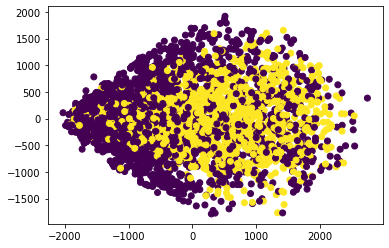

In [29]:
#i
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
pca2.fit(Xtrain)
xtrain_pca2 = pca2.transform(Xtrain)
plt.scatter(xtrain_pca2[:,0],xtrain_pca2[:,1],c = Ytrain)
    

In [30]:
Xtrain.shape

(3000, 784)

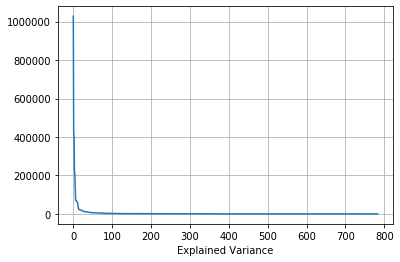

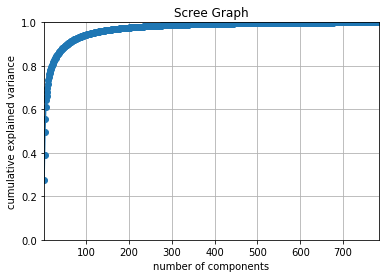

In [31]:
# ii
pca784 = PCA(n_components=784)
pca784.fit(Xtrain)
xtrain_pca784 = pca784.transform(Xtrain)
plt.plot(pca784.explained_variance_); plt.grid();
plt.xlabel('Explained Variance')
plt.figure()
plt.plot(np.arange(len(pca784.explained_variance_ratio_))+1,np.cumsum(pca784.explained_variance_ratio_),'o-')
#plot the scree graph
plt.axis([1,len(pca784.explained_variance_ratio_),0,1])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('Scree Graph')
plt.grid()
plt.show()

In [32]:
pca95 = PCA(n_components=0.95)
pca95.fit(Xtrain)
print('the number of dimensions that explain 95% variance is',pca95.n_components_)

the number of dimensions that explain 95% variance is 112


In [33]:
# iii
pca112 = PCA(n_components=112)
pca112.fit(Xtrain)
xtrain_pca= pca112.transform(Xtrain)

In [86]:
#pca SVM
param_ksvm_pca = {'kernel':['rbf','poly','sigmoid'],'gamma':[1,3,5,7,9],'class_weight':['balanced']}
best_g = GridSearchCV(SVC(),param_ksvm_pca,cv=5,scoring = 'roc_auc',n_jobs = -1)
best_g.fit(xtrain_pca,Ytrain)
print(best_g.best_params_)

{'class_weight': 'balanced', 'gamma': 7, 'kernel': 'poly'}


In [85]:
svm_opt_pca = SVC( gamma=5 , kernel= 'poly',class_weight= 'balanced')
print('svm (preprocessing:pca):')
clf_performance(xtrain_pca,Ytrain,svm_opt_pca)

svm (preprocessing:pca):
Fold-Wise AUC ROC= [0.8075226375667518, 0.804549264295027, 0.7861217172657851, 0.822522816166884, 0.8189034369885433]
Fold-Wise AUC PRC= [0.6903313338273558, 0.6772575689973437, 0.6597969400647056, 0.696985762980365, 0.7379783860794149]
Fold-Wise accuracy= [0.7287853577371048, 0.7166666666666667, 0.715, 0.7566666666666667, 0.7679465776293823]
AUC ROC: Mean is 0.807924, Stdev is 0.012811
AUC PRC: Mean is 0.692470, Stdev is 0.026057
AUC ACC: Mean is 0.737013, Stdev is 0.021491


In [ ]:
# pca xgboost

In [39]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [40]:
# tune XGBClassifier parameters 1:
param_xgb_pca = {'max_depth':[4,5,6],'min_child_weight':[4,5,6],'gamma':[0.4,0.5,0.6], 'subsample':[0.6,0.8], 'colsample_bytree':[0.8],'learning_rate':[0.01]}
best_g = GridSearchCV(XGBClassifier(),param_xgb_pca,cv=5,scoring = 'roc_auc',n_jobs = -1)
best_g.fit(xtrain_pca,Ytrain)
print(best_g.best_params_)

{'colsample_bytree': 0.8, 'gamma': 0.5, 'learning_rate': 0.01, 'max_depth': 6, 'min_child_weight': 4, 'subsample': 0.8}


In [45]:
xgb_opt_pca = XGBClassifier( colsample_bytree= 0.8, gamma= 0.7, learning_rate= 0.01, max_depth=6, min_child_weight= 4, subsample= 0.8)
print('xgb (preprocessing:pca):')
clf_performance(xtrain_pca,Ytrain,xgb_opt_pca)

xgb (preprocessing:pca):
Fold-Wise AUC ROC= [0.8347457627118644, 0.8718685975041908, 0.8625209536226486, 0.8797029241944496, 0.8988894084638765]
Fold-Wise AUC PRC= [0.7696934969897625, 0.7990593210522494, 0.7837019881189599, 0.8132427504986646, 0.8449633651626381]
Fold-Wise accuracy= [0.7554076539101497, 0.7833333333333333, 0.7616666666666667, 0.7983333333333333, 0.8130217028380634]
AUC ROC: Mean is 0.869546, Stdev is 0.021119
AUC PRC: Mean is 0.802132, Stdev is 0.025920
AUC ACC: Mean is 0.782353, Stdev is 0.021684


In [82]:
# tune XGBClassifier parameters 2:
param2_xgb_pca = {'max_depth':[7,8],'min_child_weight':[3,4],'gamma':[1], 'subsample':[0.6,0.7], 'colsample_bytree':[0.8],'learning_rate':[0.1],'reg_alpha':[0.001,0.01],'reg_lambda':[0.001,0.01,]}
best_g = GridSearchCV(XGBClassifier(),param2_xgb_pca,cv=5,scoring = 'roc_auc',n_jobs = -1)
best_g.fit(xtrain_pca,Ytrain)
print(best_g.best_params_)

{'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 4, 'reg_alpha': 0.01, 'reg_lambda': 0.001, 'subsample': 0.7}


In [83]:
xgb2_opt_pca = XGBClassifier( colsample_bytree= 0.8, gamma= 1, learning_rate= 0.1, max_depth=8, min_child_weight= 4, subsample= 0.7,reg_alpha=0.01,reg_lambda= 0.001)
print('xgb2 (preprocessing:pca):')
clf_performance(xtrain_pca,Ytrain,xgb2_opt_pca)

xgb2 (preprocessing:pca):
Fold-Wise AUC ROC= [0.881692593452519, 0.8822057180108027, 0.8826364313652449, 0.8619272676476066, 0.874538227729717]
Fold-Wise AUC PRC= [0.8130603878230814, 0.82158114635751, 0.8103175620462673, 0.7916271160965971, 0.8041127067472414]
Fold-Wise accuracy= [0.8069883527454242, 0.7933333333333333, 0.7933333333333333, 0.7883333333333333, 0.7996661101836394]
AUC ROC: Mean is 0.876600, Stdev is 0.007916
AUC PRC: Mean is 0.808140, Stdev is 0.009985
AUC ACC: Mean is 0.796331, Stdev is 0.006429


### Question No. 5 [5 Marks]
Develop an optimal pipeline for classification based on your analysis (Q1-Q4). You are free to use any tools at your disposal. However, no external data sources may be used. Describe your pipeline and report your results over the test data set. (You are required to submit your prediction file together with the assignment in a zip folder). Your prediction file should be a single column file containing the prediction score of the corresponding example in Xtest (be sure to have the same order!). Your prediction file should be named by your student ID, e.g., u100011.csv.

#### Answer :
* Base on the above results of AUC-ROC , I chose top three models (Kernel SVM ,KNN,XGBClassifier)to predict Xtest,and the scores got from leaderboard are show in table:

|classifier|score|
|:-------|------:|
|Kernel SVM|0.8269|
|KNN|0.8017|
|XGBClassifier|0.8013|

* So, the best classifier for this data set is SVC( kernel= 'rbf',class_weight='balanced',gamma = 7) with the preprocessing of Normalizer.

In [98]:
from sklearn.pipeline import Pipeline
import csv

In [99]:
# 1 XGBClassifier
#pipe_clf = Pipeline([
#                     ('pca', PCA(n_components=112)),
#                     ('clf',XGBClassifier( colsample_bytree= 0.8, gamma= 1, learning_rate= 0.1, max_depth=8, min_child_weight= 4, subsample= 0.7,reg_alpha=0.01,reg_lambda= 0.001))
#                     ])
# pipe_clf.fit(Xtrain, Ytrain) 
# Ytest = pipe_clf.predict(Xtest)


In [110]:
# 2 Kernel SVM 
pipe_clf = Pipeline([
                    ('pre', preprocessing.Normalizer()),
                    ('clf',SVC( kernel= 'rbf',class_weight='balanced',gamma = 7))
                    ])
pipe_clf.fit(Xtrain, Ytrain) 
Ytest = pipe_clf.predict(Xtest)

In [113]:
# 3 KNN
# pipe_clf = Pipeline([
#                     ('pre', preprocessing.Normalizer()),
#                     ('clf',KNeighborsClassifier(n_neighbors=12,weights = 'distance',p=1))
#                     ])
# pipe_clf.fit(Xtrain, Ytrain) 
# Ytest = pipe_clf.predict(Xtest)

In [115]:
with open('u1852866.csv','w')as f :
    for i in range(len(Ytest)):
        f.writelines(str(Ytest[i])+'\n')